# Tugas Praktikum

Nama      : Alif As'ad Ramadhan

NRP       : 5054231007

Inferensi : tt-entails

##### impor terlebih dahulu semua yang ada dalam modul logika

In [104]:
%pip install ipythonblocks
%pip install qpsolvers
from utils import*
from logic import *
from notebook import psource

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


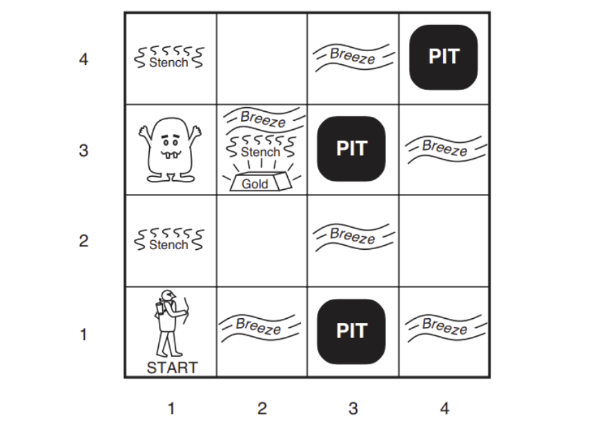

#### Definisikan variabel untuk tiap lokasi, Pit (P), Breeze (B), Stench (S), dan Wumpus (W)

## 1. Membuat ProbKB

In [108]:
P11, P12, P13, P14 = expr('P11, P12, P13, P14')
P21, P22, P23, P24 = expr('P21, P22, P23, P24')
P31, P32, P33, P34 = expr('P31, P32, P33, P34')
P41, P42, P43, P44 = expr('P41, P42, P43, P44')

B11, B12, B13, B14 = expr('B11, B12, B13, B14')
B21, B22, B23, B24 = expr('B21, B22, B23, B24')
B31, B32, B33, B34 = expr('B31, B32, B33, B34')
B41, B42, B43, B44 = expr('B41, B42, B43, B44')

S11, S12, S13, S14 = expr('S11, S12, S13, S14')
S21, S22, S23, S24 = expr('S21, S22, S23, S24')
S31, S32, S33, S34 = expr('S31, S32, S33, S34')
S41, S42, S43, S44 = expr('S41, S42, S43, S44')

W11, W12, W13, W14 = expr('W11, W12, W13, W14')
W21, W22, W23, W24 = expr('W21, W22, W23, W24')
W31, W32, W33, W34 = expr('W31, W32, W33, W34')
W41, W42, W43, W44 = expr('W41, W42, W43, W44')

Gold23 = expr('Gold23')

In [109]:
# Inisialisasi knowledge base untuk Wumpus
wumpus_kb = PropKB()

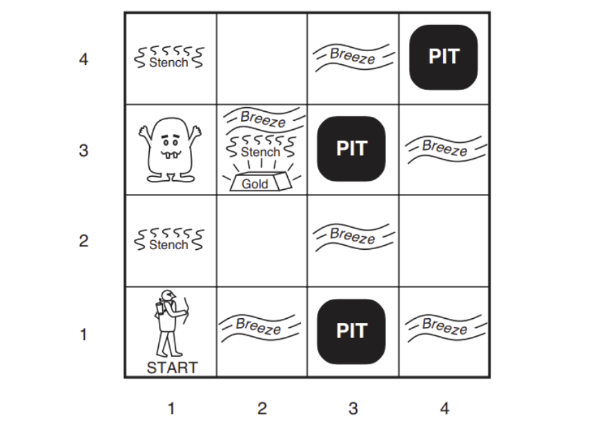

In [111]:
# Informasi awal:
wumpus_kb.tell(~P11)  # Tidak ada Pit di [1,1]
wumpus_kb.tell(~W11)  # Tidak ada Wumpus di [1,1]

# B21 berarti ada Pit di sekitar [1,1], [2,2], atau [3,1]
wumpus_kb.tell(B21 | '<=>' | ((P11 | P22 | P31)))

# B12 berarti ada Pit di sekitar [1,1], [1,3], atau [2,2]
wumpus_kb.tell(B12 | '<=>' | ((P11 | P13 | P22)))

# B23 berarti ada Pit di sekitar [2,2], [2,4], [1,3], [3,3]
wumpus_kb.tell(B23 | '<=>' | ((P22 | P13 | P24 | P23)))

# B32 berarti ada Pit di sekitar [3,3], [2,2], [4,2], [3,1]
wumpus_kb.tell(B23 | '<=>' | ((P33 | P22 | P42 | P31)))

# S32 berarti ada Wumpus di sekitar [3,3], [2,2], [4,2], [3,1]
wumpus_kb.tell(S23 | '<=>' | ((W33 | W22 | W42 | W31)))

# S23 berarti ada Wumpus di sekitar [2,3]
wumpus_kb.tell(S21 | '<=>' | (W31 | W11 | W22))


# Kondisi pasti
wumpus_kb.tell(P13)     # Ada Pit di [1,3]
wumpus_kb.tell(W31)     # Ada Wumpus di [3,1]
wumpus_kb.tell(~P22)    # Tidak ada Pit di [2,2]
wumpus_kb.tell(~W22)    # Tidak ada Wumpus di [2,2]
wumpus_kb.tell(P33)     # Ada Pit di [3,3]
wumpus_kb.tell(~P12)    # Tidak ada Pit di [1,2]
wumpus_kb.tell(~W12)    # Tidak ada Wumpus di [1,2]
wumpus_kb.tell(~P23)    # Tidak ada Pit di [2,3]
wumpus_kb.tell(~W23)    # Tidak ada Wumpus di [2,3]

# Gold di [2,3]
wumpus_kb.tell(Gold23)

Kita dapat memeriksa klausa yang disimpan dalam KB

In [113]:
wumpus_kb.clauses

[~P11,
 ~W11,
 (~P11 | B21),
 (~P22 | B21),
 (~P31 | B21),
 (P11 | P22 | P31 | ~B21),
 (~P11 | B12),
 (~P13 | B12),
 (~P22 | B12),
 (P11 | P13 | P22 | ~B12),
 (~P22 | B23),
 (~P13 | B23),
 (~P24 | B23),
 (~P23 | B23),
 (P22 | P13 | P24 | P23 | ~B23),
 (~P33 | B23),
 (~P22 | B23),
 (~P42 | B23),
 (~P31 | B23),
 (P33 | P22 | P42 | P31 | ~B23),
 (~W33 | S23),
 (~W22 | S23),
 (~W42 | S23),
 (~W31 | S23),
 (W33 | W22 | W42 | W31 | ~S23),
 (~W31 | S21),
 (~W11 | S21),
 (~W22 | S21),
 (W31 | W11 | W22 | ~S21),
 P13,
 W31,
 ~P22,
 ~W22,
 P33,
 ~P12,
 ~W12,
 ~P23,
 ~W23,
 Gold23]

# Proses pengubahan klausa menjadi `Conjunctive Normal Form (CNF)`

#### Contoh 1:

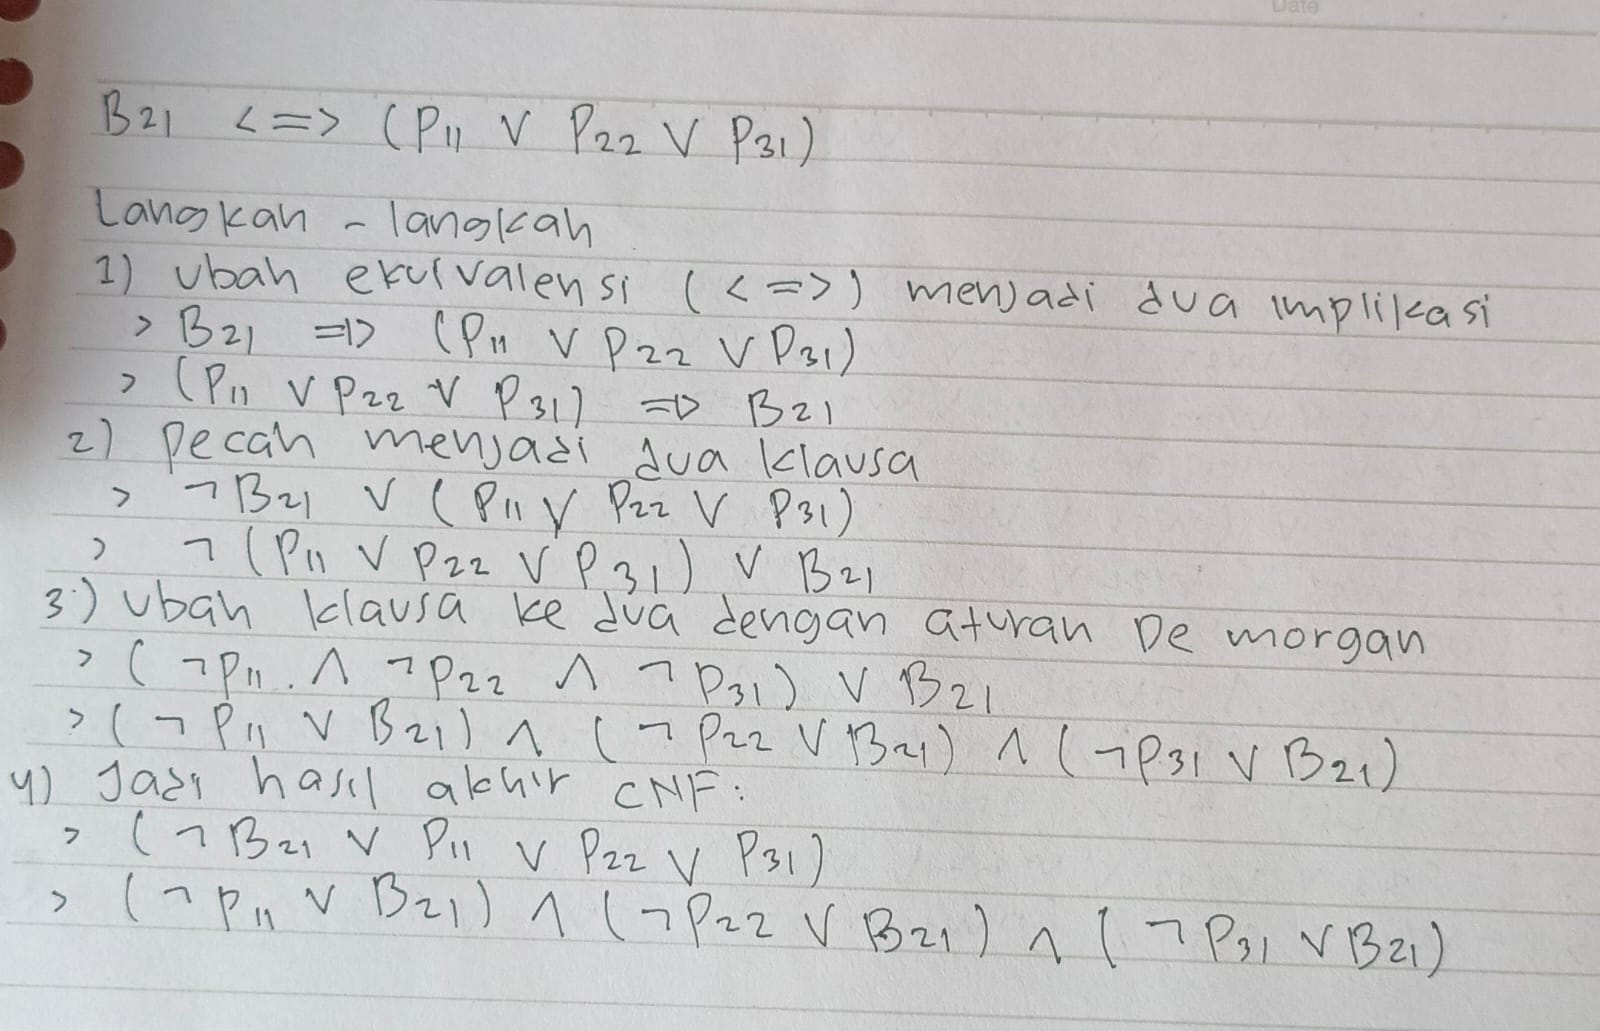

#### Contoh 2:

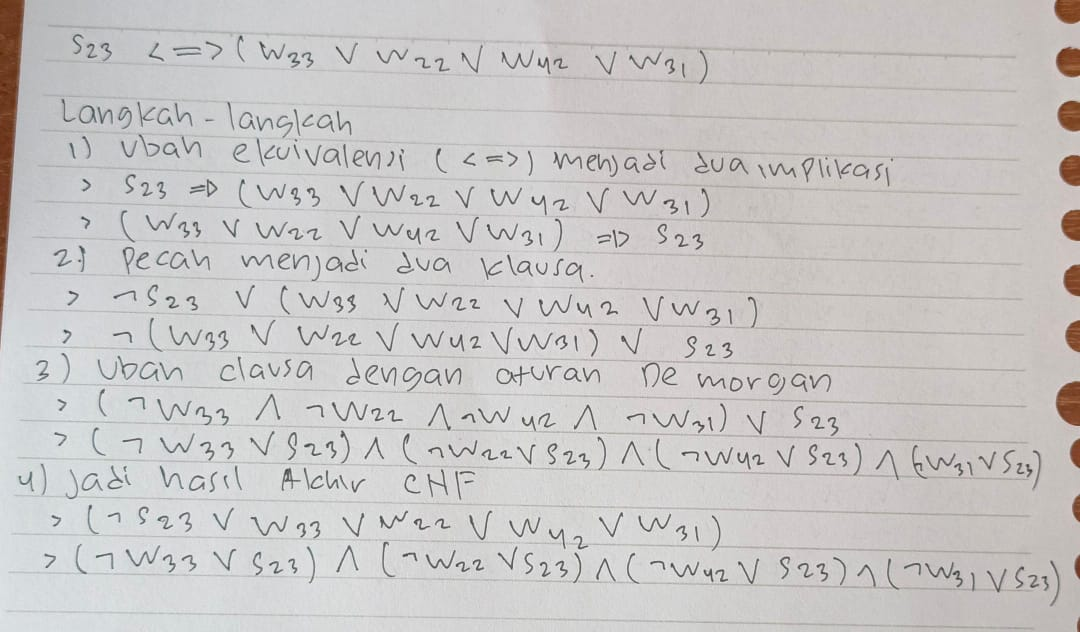

Proses pengubahan Klausa akan sama seperti contoh 1 dan 2, dengan 3 tahapan:
1. Ubah ekuivalensi (<==>) menjadi dua Implikasi
2. Pecah menjadi dua klausa
3. Ubah klausa dengan aturan De Morgan

# Fungsi - fungsi yang digunakan

In [209]:
psource(tt_check_all)

In [114]:
psource(tt_entails)

# Membuat Fungsi untuk melakukan cek apakah jalur [1,1] ke [2,3] aman

In [131]:
def is_safe_path(kb):
    safe = True
    
    # Periksa apakah [1,2] aman (tidak ada pit dan wumpus)
    safe = safe and wumpus_kb.ask_if_true(~P12) and wumpus_kb.ask_if_true(~W12)
    
    # Periksa apakah [2,2] aman (tidak ada pit dan wumpus)
    safe = safe and wumpus_kb.ask_if_true(~P22) and wumpus_kb.ask_if_true(~W22)
    
    # Periksa apakah [2,3] aman (tidak ada pit dan wumpus, dan ada emas)
    safe = safe and wumpus_kb.ask_if_true(~P23) and wumpus_kb.ask_if_true(~W23) and wumpus_kb.ask_if_true(Gold23)
    
    return safe

In [122]:
# Jalankan pengecekan apakah jalur aman
if is_safe_path(wumpus_kb):
    print("Jalur dari [1,1] ke [2,3] aman.")
else:
    print("Jalur dari [1,1] ke [2,3] tidak aman.")

Jalur dari [1,1] ke [2,3] aman.


In [133]:
# Cek apakah ada emas di kolom [2,3]
wumpus_kb.ask_if_true(Gold23)

True

# Pembuktian Menggunakan Truth Table

Dalam pembuktian menggunakan tabel kebenaran (truth table), Fokus utama adalah mengincar kombinasi nilai yang menghasilkan nilai true (benar) karena tujuan utama dari pembuktian adalah untuk menunjukkan bahwa proposisi yang kita analisis adalah valid atau konsisten. Untuk melakukannya berikut tahapan yang akan di lakukan untuk mendapatkan kombinasi nilai yang bernilai true (benar)

In [141]:
import itertools
import pandas as pd
# menyimpan semua kalusa yang di simpan dalam KB
clauses = ['P11', 'W11', 'P22', 'P31', 'P13', 'B21', 'B12', 'B23', 'P33', 'P24', 'P42', 'W33', 'W22', 'W42', 'W31', 'S23', 'S21', 'Gold23', 'P23', 'P12', 'W12', 'W23']

In [143]:
# Buat semua kemungkinan kombinasi True/False untuk setiap variabel
combinations = list(itertools.product([True, False], repeat=len(clauses)))

In [145]:
# Fungsi untuk mengevaluasi setiap klausa
def evaluate_clause(assignment):
    P11, W11, P22, P31, P13, B21, B12, B23, P33, P24, P42, W33, W22, W42, W31, S23, S21, Gold23, P23, P12, W12, W23 = assignment  
    return (
        not P11 and 
        not W11 and  
        (not P11 or B21) and 
        (not P22 or B21) and 
        (not P31 or B21) and 
        (P11 or P22 or P31 or not B21) and 
        (not P11 or B12) and  
        (not P13 or B12) and  
        (not P22 or B12) and  
        (P11 or P13 or P22 or not B12) and  
        (not P22 or B23) and  
        (not P13 or B23) and  
        (not P24 or B23) and  
        (not P23 or B23) and  
        (P22 or P13 or P24 or P23 or not B23) and  
        (not P33 or B23) and  
        (not P22 or B23) and  
        (not P42 or B23) and  
        (not P31 or B23) and  
        (P33 or P22 or P42 or P31 or not B23) and  
        (not W33 or S23) and  
        (not W22 or S23) and  
        (not W42 or S23) and  
        (not W31 or S23) and  
        (W33 or W22 or W42 or W31 or not S23) and  
        (not W31 or S21) and  
        (not W11 or S21) and  
        (not W22 or S21) and  
        (W31 or W11 or W22 or not S21) and  
        P13 and  
        W31 and  
        not P22 and 
        not W22 and 
        P33 and  
        not P12 and 
        not W12 and 
        not P23 and 
        not W23 and 
        Gold23  
    )

In [147]:
# Evaluasi setiap kombinasi berdasarkan klausa
results = [evaluate_clause(assignment) for assignment in combinations]

In [151]:
# Buat DataFrame dari kombinasi variabel dan hasil evaluasi
df = pd.DataFrame(combinations, columns=clauses)
df['KB'] = results

In [155]:
# Tampilan DataFrame
df.head(10)

,P11,W11,P22,P31,P13,B21,B12,B23,P33,P24,...,W42,W31,S23,S21,Gold23,P23,P12,W12,W23,KB
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,True,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,True,False
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,True,False,False
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,True,False
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,False,False,False,False
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,True,False
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,False,True,True,False,False


# Cek berapa kombinasi (KB) yang bernilai True

In [169]:
kb = pd.DataFrame(df.KB.value_counts().reset_index())
kb.head()

,KB,count
0,False,4194272
1,True,32


### Dari banyak kombinasi yang di coba, diketahui KB yang bernilai `True` sebanyak `32` 

In [179]:
# Menampilkan Truth Table dari kombinasi yang memiliki KB yang bernilai `True`
kb_true = df[df['KB'] == True]
kb_true.head(10)

,P11,W11,P22,P31,P13,B21,B12,B23,P33,P24,...,W42,W31,S23,S21,Gold23,P23,P12,W12,W23,KB
3670543,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,True
3670799,False,False,False,True,True,True,True,True,True,True,...,False,True,True,True,True,False,False,False,False,True
3671567,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,True
3671823,False,False,False,True,True,True,True,True,True,True,...,False,True,True,True,True,False,False,False,False,True
3672591,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,True
3672847,False,False,False,True,True,True,True,True,True,True,...,False,True,True,True,True,False,False,False,False,True
3673615,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,False,False,False,False,True
3673871,False,False,False,True,True,True,True,True,True,True,...,False,True,True,True,True,False,False,False,False,True
3674639,False,False,False,True,True,True,True,True,True,False,...,True,True,True,True,True,False,False,False,False,True
3674895,False,False,False,True,True,True,True,True,True,False,...,False,True,True,True,True,False,False,False,False,True


### Cek apakah pada kotak `[2,3]` aman dilewati

Koordinat `[2,3]` didefinisikan aman jika pada koordinat tersebut tidak terdapat `Wumpus` dan tidak terdapat `Pit`

In [202]:
kb_true_safe = pd.DataFrame(kb_true[['W23', 'P23']].value_counts().reset_index(name='count'))
kb_true_safe

,W23,P23,count
0,False,False,32


### Cek apakah pada kotak [2,3] terdapat emas

In [200]:
kb_true_gold = pd.DataFrame(kb_true['Gold23'].value_counts().reset_index(name='count'))
kb_true_gold

,Gold23,count
0,True,32


## Jadi setiap kombinasi tabel kebenaran yang memiliki KB True, maka menandakan bahwa koordinat [2,3] aman untuk dilewati dan terdapat emas